In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


# Step 1: setting up the enviroment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Data loading and exploration

In [3]:
df=pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv", encoding='latin1')

#incluidng clean up functions
df['TERRITORY']=df['TERRITORY'].fillna('North America')
df['TERRITORY']=df['TERRITORY'].replace('Japan','APAC')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium


In [5]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,North America,Yoshido,Juri,Medium


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [8]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [9]:
df_value=pd.DataFrame(df.value_counts())
df_value

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY      STATE    POSTALCODE COUNTRY   TERRITORY     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10102       39              100.00    2               4808.31 1/10/2003 0:00  Shipped    1      1        2003    Vintage Cars     102  S18_1342    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Medium        1
10342       22              100.00    3               3160.74 11/24/2004 0:00 Shipped    4      11       2004    Classic Cars     142  S18_1984    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne Victoria 3004       Australia APAC          Ferguson        Peter            Medium        1
10324       38              100.00    6               6832.02 11/5/2004 0:00  Shipped    4      11       2004    Vintage Cars     50   S18_4668    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Medium        1
            47              100.00    8               7207.45 11/5/2004 0:00  Shipped    4      11       2004    Classic Cars     163  S18_2238    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Large         1
            48              100.00    4               8209.44 11/5/2004 0:00  Shipped    4      11       2004    Trucks and Buses 64   S32_3522    Vitachrome Inc.            2125551500      2678 Kingston Rd.                       Suite 101    NYC       NY       10022      USA       North America Frick           Michael          Large         1
...                                                                                                                                                                                                                                                                                                                                                   ...
10204       39              33.23     2               1295.97 12/2/2003 0:00  Shipped    4      12       2003    Vintage Cars     41   S24_3969    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Small         1
            40              79.62     9               3184.80 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     85   S24_3191    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
                            100.00    13              4032.00 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     124  S18_1589    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
            42              100.00    7               4242.00 12/2/2003 0:00  Shipped    4      12       2003    Classic Cars     117  S24_2887    Muscle Machine Inc         2125557413      4092 Furth Circle                       Suite 400    NYC       NY       10022      USA       North America Young           Jeff             Medium        1
10420       66              92.95     6               6134.70 5/29/2005 0:00  In Process 2      5        2005    Vintage Cars     92   S18_4409    Souveniers And Things Co.  +61 2 9495 855

In [10]:
df.value_counts()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  SALES    ORDERDATE        STATUS      QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE       MSRP  PRODUCTCODE  CUSTOMERNAME                PHONE            ADDRESSLINE1                             ADDRESSLINE2  CITY       STATE     POSTALCODE  COUNTRY    TERRITORY      CONTACTLASTNAME  CONTACTFIRSTNAME  DEALSIZE
10102        39               100.00     2                4808.31  1/10/2003 0:00   Shipped     1       1         2003     Vintage Cars      102   S18_1342     Vitachrome Inc.             2125551500       2678 Kingston Rd.                        Suite 101     NYC        NY        10022       USA        North America  Frick            Michael           Medium      1
10342        22               100.00     3                3160.74  11/24/2004 0:00  Shipped     4       11        2004     Classic Cars      142   S18_1984     Australian Collectors, Co.  03 9520 4555     636 St Kilda Road                        Level 3       Melbourne

In [11]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [12]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Variable Indentification:

Ordernumber, quantityordered, orderlinenumber, qrt_id,month_id,year_id (last 3 represent time), and msrp are numbers.

Priceeach, and sales are currency values.

Orderdate, status, productline, productcoe cutsomername, phone, addressline 1 & 2, city, statem postalcode, country, territory, contactlast/firstname, and dealzise are all objects/string data.

# Step 3: Data visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


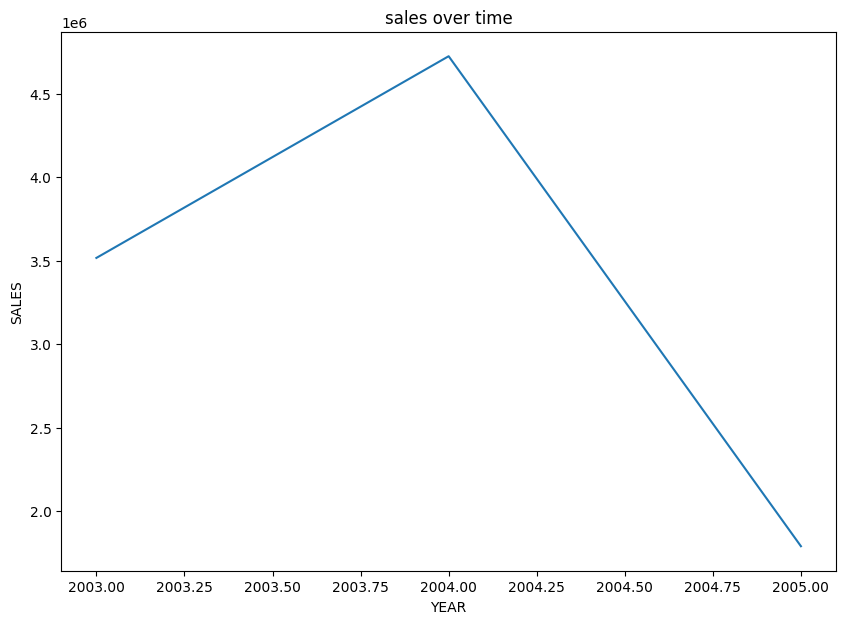

In [13]:
#1. Use Seaborn and Matplotlib to create a line plot visualizing sales data over time.
#by year
pivot_table_salesY = pd.pivot_table(
    data=df,
    values='SALES',
    index='YEAR_ID',
    aggfunc='sum'
)
pivot_table_salesY

plt.figure(figsize=(10,7))

sns.lineplot(x='YEAR_ID',y='SALES',data=pivot_table_salesY)

plt.xlabel('YEAR')
plt.ylabel('SALES')
plt.title("sales over time")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

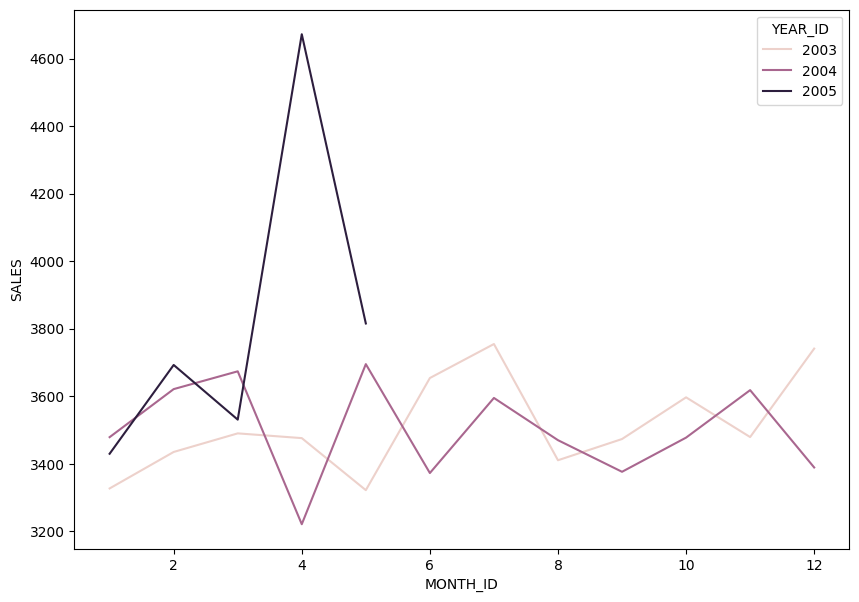

In [14]:
#by month
plt.figure(figsize=(10,7))
sns.lineplot(x='MONTH_ID',y='SALES',data=df, hue="YEAR_ID", errorbar=None)
plt.show()

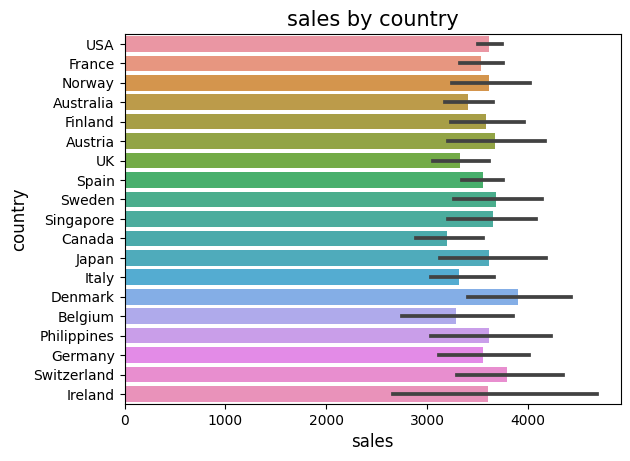

In [15]:
sns.barplot(data=df,y='COUNTRY',x='SALES')
plt.xlabel('sales', fontsize=12)
plt.ylabel('country', fontsize=12)
plt.title("sales by country", fontsize=15)
plt.show()

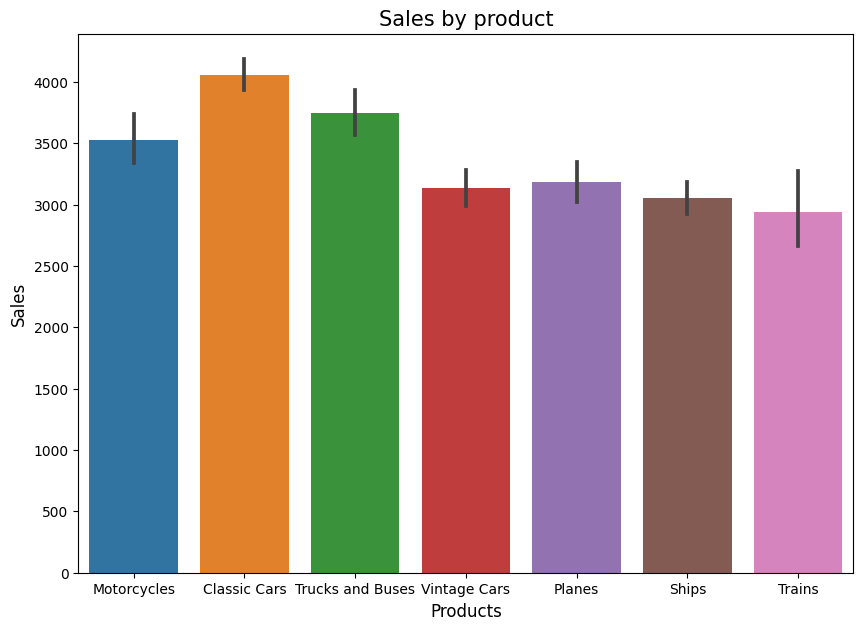

In [16]:
#3. Create a bar plot to visualize the sales distribution across different products.
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='PRODUCTLINE',y='SALES')
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title("Sales by product", fontsize=15)
plt.show()

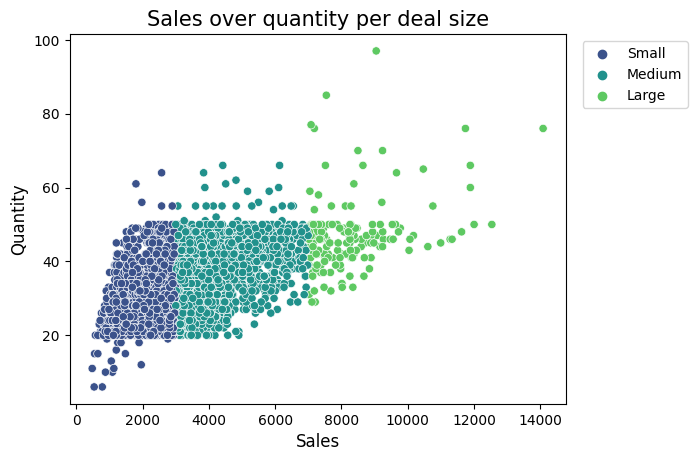

In [17]:
#4. Create a scatter plot to visualize the relationship between sales and dealsize.
#scatter plot using seaborn

sns.scatterplot(x='SALES',hue='DEALSIZE',y='QUANTITYORDERED',data=df,palette='viridis')

plt.xlabel('Sales', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title("Sales over quantity per deal size", fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Step 4: Data Analysis

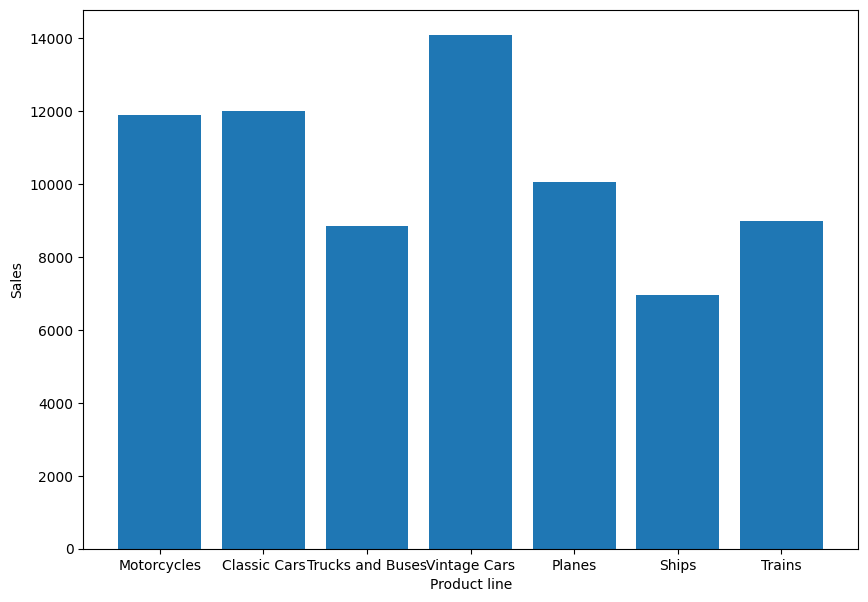

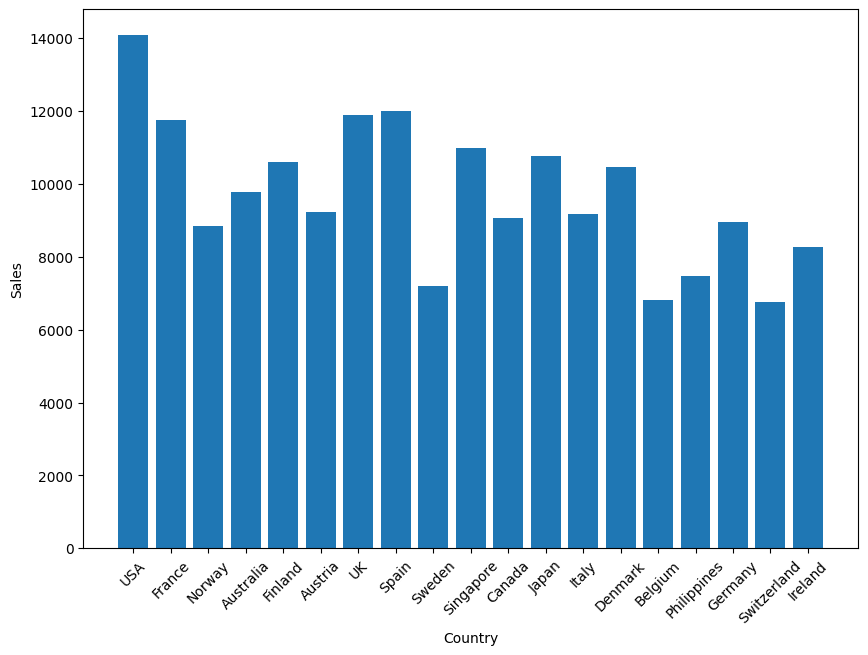

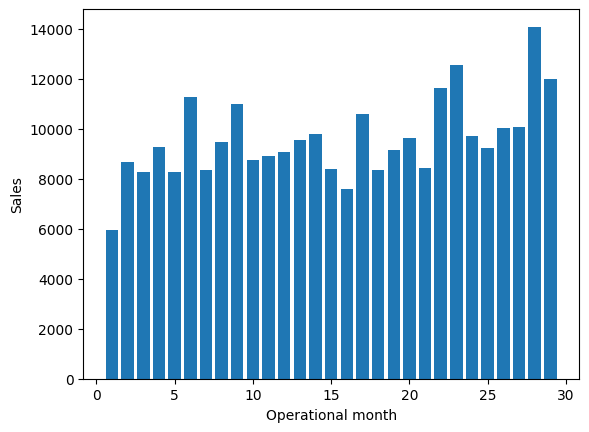

In [18]:
#1. Analyse the sales data by grouping and aggregating the data based on different factors,
#such as product, region, or date.
plt.figure(figsize=(10,7))
x=df['PRODUCTLINE']
y=df['SALES']
plt.bar(x,y) 
plt.xlabel('Product line')
plt.ylabel('Sales')
plt.show()
plt.figure(figsize=(10,7))
x=df['COUNTRY']
y=df['SALES']
plt.bar(x,y) 
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()
x=((df['YEAR_ID']-2003)*12)+df['MONTH_ID']
y=df['SALES']
plt.bar(x,y)
plt.xlabel('Operational month')
plt.ylabel('Sales')
plt.show()

**From these charts we observe that Classic cars sold the best, the USA had the most sales, and that there was a teady increase in sales over time with certains months being especially productive.**

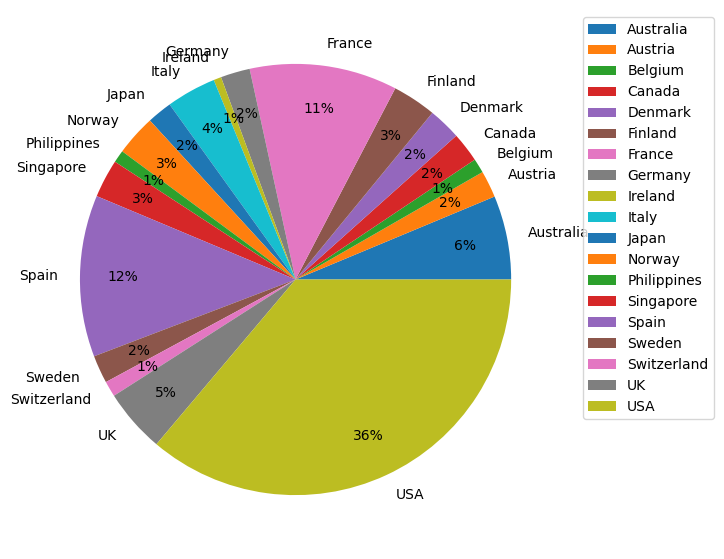

In [19]:
#2. Calculate the percentage of sales contributed by each region:

pdf=pd.DataFrame(df.groupby('COUNTRY').SALES.sum())
plt.figure(figsize=(10,7))
plt.pie(pdf['SALES'],labels=pdf.index,pctdistance=0.8,autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [20]:
#3. Analyse the performance of different products in terms of sales:

**We know from a previous chart how different products perform. Classic cars are the best selling, followed by Truks and Busses, Motercycles,Planes, Vintage Card, Ships, and lastly Trains.**

In [21]:
#4. Calculate the correlation between sales and dealsize.

**Thanks to our Scatterplot, we know that larger dealzise directly corroelates to increased sales.**

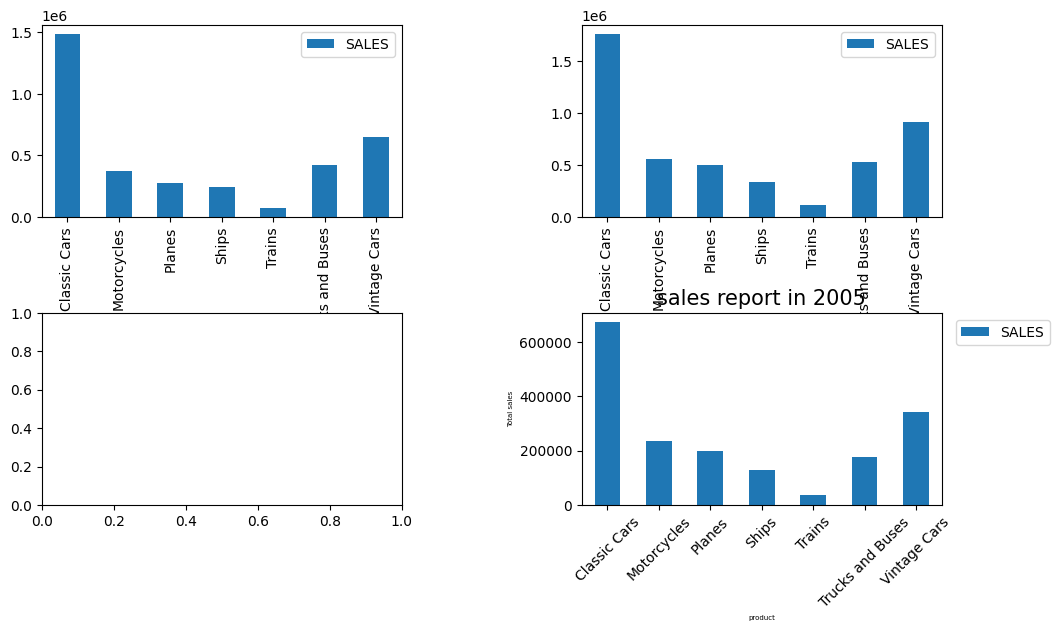

In [22]:
#5. Identify the top-performing (top 3) products in terms of sales year on year.
df_2004= df[df['YEAR_ID']==2004]
df_2003= df[df['YEAR_ID']==2003]
df_2005= df[df['YEAR_ID']==2005]
pivot_2004 = pd.pivot_table(
    data=df_2004,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_2005 = pd.pivot_table(
    data=df_2005,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_2003 = pd.pivot_table(
    data=df_2003,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)

fig, axes = plt.subplots(2, 2)
pivot_2003.plot(kind='bar', figsize=(15,6), ax=axes[0,0])
plt.xlabel('product', fontsize=5)
plt.ylabel('Total sales', fontsize=5)
plt.title("sales report in 2003", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
 
pivot_2004.plot(kind='bar', figsize=(15,6), ax=axes[0,1])
plt.xlabel('product', fontsize=5)
plt.ylabel('Total sales', fontsize=5)
plt.title("sales report in 2004", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

pivot_2005.plot(kind='bar', figsize=(15,6), ax=axes[1,1])
plt.xlabel('product', fontsize=5)
plt.ylabel('Total sales', fontsize=5)
plt.title("sales report in 2005", fontsize=15)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(
    hspace=0.5,  # Increase vertical spacing
    wspace=0.5,  # Increase horizontal spacing
    left=0.2,  # Increase left margin
    right=0.8,  # Increase right margin
    top=0.9,  # Increase top margin
    bottom=0.1  # Increase bottom margin
)
plt.show()

**For 2003: the Top 3 were Classic Cars, Vintage Cars, & Tricks and busses.**

**for 2004, it looked like Classic Cards, Vintage Cars, and Motercycles.**

**For 2005, it was Classic Cars, Vintage Cars, and Motercycles again**

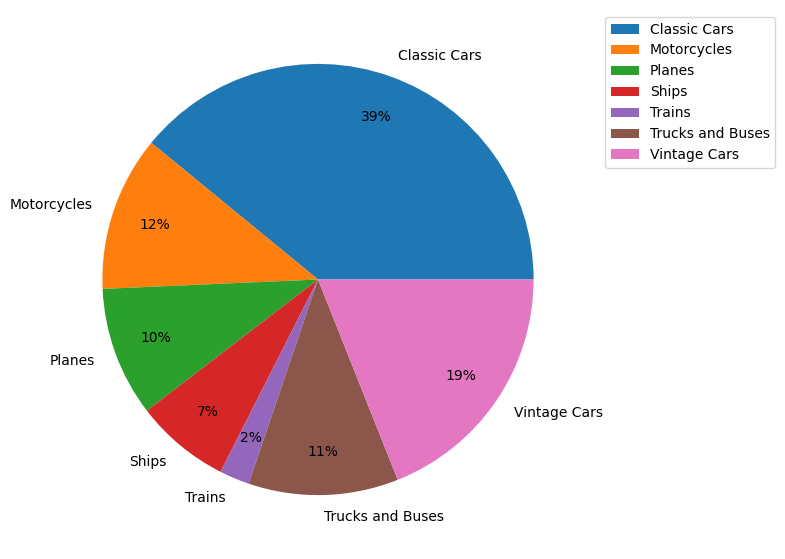

In [23]:
#6. Calculate the percentage of sales contributed by the top-performing products.
pdf=pd.DataFrame(df.groupby('PRODUCTLINE').SALES.sum())
plt.figure(figsize=(10,7))
plt.pie(pdf['SALES'],labels=pdf.index,pctdistance=0.8,autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

**The contributions from the top products are:**

**Classic Cards at 39%** 

**Vintage cards at 19%**

**Motercycles at 12%**

**And Trucks and Busses at 11%**

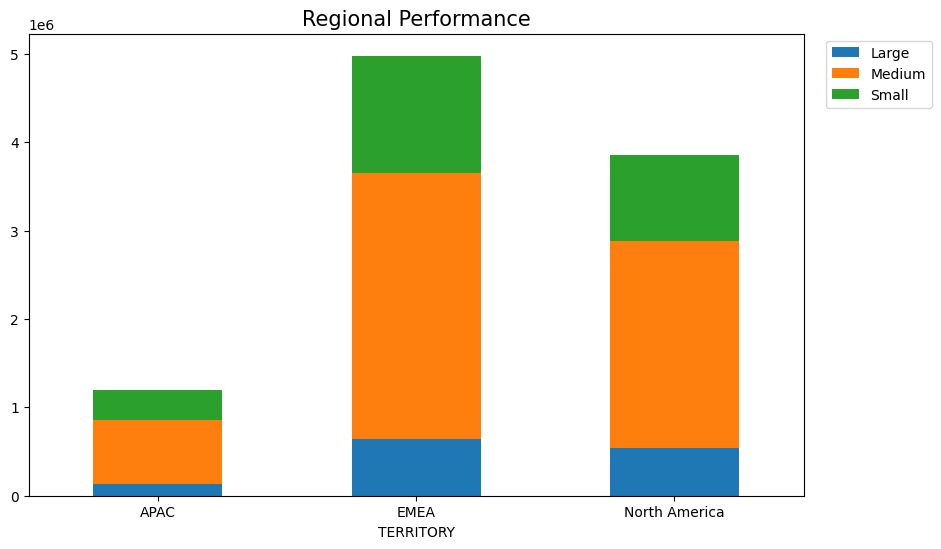

In [24]:
#7. Analyse the performance of different regions in terms of sales and dealsize.
pivot_R_Sales= pd.pivot_table(
    data=df,
    values='SALES',
    index='TERRITORY',
    columns='DEALSIZE',
    aggfunc='sum'
)
pivot_R_Sales.plot(kind='bar',figsize=(10,6),stacked=True)
plt.title("Regional Performance", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Step 5: key questions to answer

**1. What is the overall trend of sales over time?**

There is not much of a noticable trend over the entire listed time. It is perhaps tending upward, but the sales figures are largely holding steady.

**2. Which products have the highest sales?**

The products with the highest sales are Classic Cards.

**3. What is the correlation between sales and dealsize?**

Sales increase with Dealsize.

**4. How do different regions perform in terms of sales and dealsize?**

The EMEA territory is performs ahead of the others in all catagories, giving larger sales figures and figures for every deal size. North America is a close second, and APAC is well behind.

**5. Which products contribute the most to the total sales?**

The biggest contributer to sales is easily Classic Cars at 39% sales contribution, with Vintage Cars the closest after at 19% contribution.

# Step 6: Conclusion and Recomendation

**1. Summarize your findings and insights from the analysis.**

The best selling products are lassic cars, the biggest sales are concusted in the EMRA territories and the United States, and the bigger the deal the bigger the sales.

**2. Identify potential areas for further exploration or analysis, such as studying the impact of promotions, seasonality, or customer demographics on sales.**

Of those three catagories, customer demophraphics is easily the most useful. More information on the customer in general would be helpful as it would let us identify who it would be best to sell to.

**3. Provide recommendations based on your analysis that could help improve sales performance.**

Well the best selling products are classic cars and the most lucritive territory is the EMEA territory, although the most lucritive single country is the USA. A safe bet would be to promote bigger deals of classic cards in these areas.